## In this 

In [1]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [2]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [3]:
# recgli = read.csv("/home/sf673542/MultiParametricMRI/MP_MRI_Jan2019/AnnotateData/recgli_annotation9_onlyGoodBiopsies.csv")
recgli = read.csv("/home/sf673542/MultiParametricMRI/MP_MRI_Jan2019/AnnotateData/recgli_annotation10_CELorNELorUNK.csv")
colnames(recgli)
dim(recgli)

[1] "vialid"                           "b_number"                        
 [3] "t_number_x"                       "t_number_y"                      
 [5] "sf_number"                        "current_scan_date"               
 [7] "current_surgery_date"             "current_hist_grade"              
 [9] "current_hist_type"                "tumor_cell_evaluation"           
[11] "necrosis"                         "mv_hyperplasia"                  
[13] "mv_delicate_vasculature"          "f8_delicate"                     
[15] "f8_simple"                        "f8_complex"                      
[17] "mib_1"                            "avgerage_cells"                  
[19] "treatment_related_ab"             "bx_pure_treatment_effect"        
[21] "percent_tumor_nuclei"             "nfl"                             
[23] "nfse"                             "nt1c"                            
[25] "nt1v"                             "nt1d"                            
[27] "nadc.1"                           "nfa.1"                           
[29] "nev1.1"                           "nev2.1"                          
[31] "nev3.1"                           "nevrad.1"                        
[33] "nadc.2"                           "nfa.2"                           
[35] "nev1.2"                           "nev2.2"                          
[37] "nev3.2"                           "nevrad.2"                        
[39] "cbvn_nlin"                        "phn_nlin"                        
[41] "recov_nlin"                       "phn_npar"                        
[43] "recov_npar"                       "recovn_npar"                     
[45] "ccri"                             "cni"                             
[47] "crni"                             "ncho"                            
[49] "ncre"                             "nnaa"                            
[51] "nlac"                             "nlip"                            
[53] "newdata"                          "olddata"                         
[55] "exclude_bc_hematoma_or_ventricle" "exclude_perf"                    
[57] "nLL"                              "comments"                        
[59] "perf_quant"                       "include_perf"                    
[61] "spec_quant"                       "include_spec"                    
[63] "diffu1000_quant"                  "diffu2000_quant"                 
[65] "exclude_bc_anat"                  "exclude_bc_pathology"            
[67] "include_diffu1000"                "include_diffu2000"               
[69] "exclude_histology"                "txe_comments"                    
[71] "outcome"                          "in_CEL"                          
[73] "in_T2all"                         "in_NEL"                          
[75] "CELorNEL"

[1] 366  75

In [4]:
recgli = recgli[recgli$outcome=="txe"|recgli$outcome == "rHGG",]
recgli = droplevels.data.frame(recgli)

In [5]:
recgli_cel = recgli[recgli$CELorNEL == "CEL", ]


In [6]:
recgli_nel = recgli[recgli$CELorNEL == "NEL", ]

## Visualization of statistically significant params

### CEL 

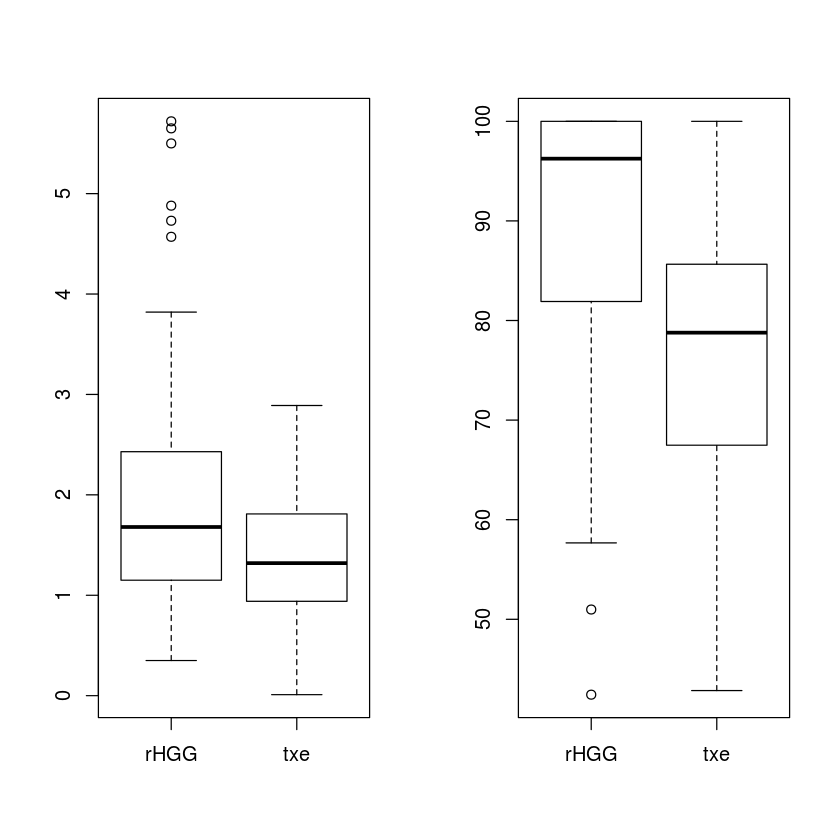

In [7]:
par(mfrow = c(1,2))
boxplot(cbvn_nlin ~outcome, data = recgli_cel)
boxplot(recov_npar ~outcome, data = recgli_cel)

### NEL 

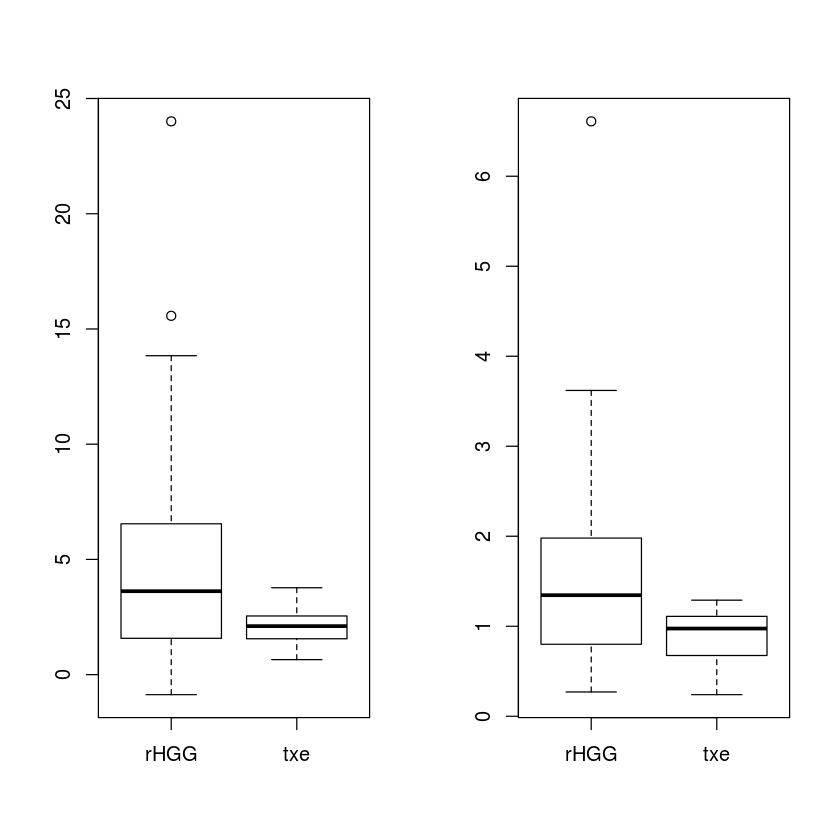

In [8]:
par(mfrow = c(1,2))
boxplot(cni ~outcome, data = recgli_nel)
boxplot(ncho ~outcome, data = recgli_nel)

## Cycling through thresholds, calculating the sensitivity & specificity of thresholds

### NEL 

In [9]:
#install.packages('pROC')

In [9]:
library('pROC')

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [10]:
summary(recgli_nel$ncho, na.rm = T)
summary(recgli_nel$ncre, na.rm = T)
summary(recgli_nel$cni, na.rm = T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.2400  0.7475  1.1200  1.3969  1.7625  6.6100      59 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-0.2900  0.4375  0.6900  0.8294  1.0075  5.1600      59 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -0.870   1.593   2.905   4.080   5.077  24.010      59 

In [11]:
thresh_cho = min(recgli_nel$ncho+0.01, na.rm = T)
thresh_cre = min(recgli_nel$ncre+0.01, na.rm = T)
thresh_cni = min(recgli_nel$cni+0.01, na.rm = T)
step_cho = .2
step_cre = .1
step_cni = .1

In [12]:
recgli_nel_thresh = data.frame(recgli_nel, cho_thresh = NA, cre_thresh = NA, cni_thresh = NA)

In [13]:
recgli_nel_thresh = recgli_nel_thresh[!is.na(recgli_nel_thresh$cni),]

In [14]:
while (thresh_cni < max(recgli_nel_thresh$cni+0.01, na.rm = T)){
    recgli_nel_thresh$cni_thresh = ifelse(recgli_nel_thresh$cni < thresh_cni, "txe", "rHGG")
    recgli_nel_thresh$cni_thresh = as.factor(recgli_nel_thresh$cni_thresh)
    conf_mat = confusionMatrix( recgli_nel_thresh$cni_thresh, recgli_nel_thresh$outcome)
    print("*********")
    print(paste("threshold = ", thresh_cni))
    print("*********")
    print(conf_mat)
    thresh_cni = thresh_cni+step_cni
}

[1] "*********"
[1] "threshold =  -0.86"
[1] "*********"
Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG   51  16
      txe     1   0
                                          
               Accuracy : 0.75            
                 95% CI : (0.6302, 0.8471)
    No Information Rate : 0.7647          
    P-Value [Acc > NIR] : 0.673304        
                                          
                  Kappa : -0.0285         
 Mcnemar's Test P-Value : 0.000685        
                                          
            Sensitivity : 0.9808          
            Specificity : 0.0000          
         Pos Pred Value : 0.7612          
         Neg Pred Value : 0.0000          
             Prevalence : 0.7647          
         Detection Rate : 0.7500          
   Detection Prevalence : 0.9853          
      Balanced Accuracy : 0.4904          
                                          
       'Positive' Class : rHGG            
             

In [16]:
while (thresh_cho < max(recgli_nel_thresh$ncho+0.01, na.rm = T)){
    recgli_nel_thresh$cho_thresh = ifelse(recgli_nel_thresh$ncho < thresh_cho, "txe", "rHGG")
    recgli_nel_thresh$cho_thresh = as.factor(recgli_nel_thresh$cho_thresh)
    conf_mat = confusionMatrix( recgli_nel_thresh$cho_thresh, recgli_nel_thresh$outcome)
    print("*********")
    print(paste("threshold = ", thresh_cho))
    print("*********")
    print(conf_mat)
    thresh_cho = thresh_cho+step_cni
}

[1] "*********"
[1] "threshold =  0.25"
[1] "*********"
Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG   52  15
      txe     0   1
                                         
               Accuracy : 0.7794         
                 95% CI : (0.6624, 0.871)
    No Information Rate : 0.7647         
    P-Value [Acc > NIR] : 0.4531415      
                                         
                  Kappa : 0.0925         
 Mcnemar's Test P-Value : 0.0003006      
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0625         
         Pos Pred Value : 0.7761         
         Neg Pred Value : 1.0000         
             Prevalence : 0.7647         
         Detection Rate : 0.7647         
   Detection Prevalence : 0.9853         
      Balanced Accuracy : 0.5312         
                                         
       'Positive' Class : rHGG           
                                 

In [17]:
table(recgli_nel_thresh$outcome)


rHGG  txe 
  52   16 

## testing out classification on itself:

In [22]:
roc_cni = roc(recgli_nel$outcome, recgli_nel$cni,
levels=c("txe", "rHGG"))

In [23]:
roc_cho = roc(recgli_nel_thresh$outcome, recgli_nel_thresh$ncho,
levels=c("txe", "rHGG"))

In [24]:
roc_cre = roc(recgli_nel_thresh$outcome, recgli_nel_thresh$ncre,
levels=c("txe", "rHGG"))

Area under the curve: 0.6923

95% CI: 0.5716-0.813 (DeLong)

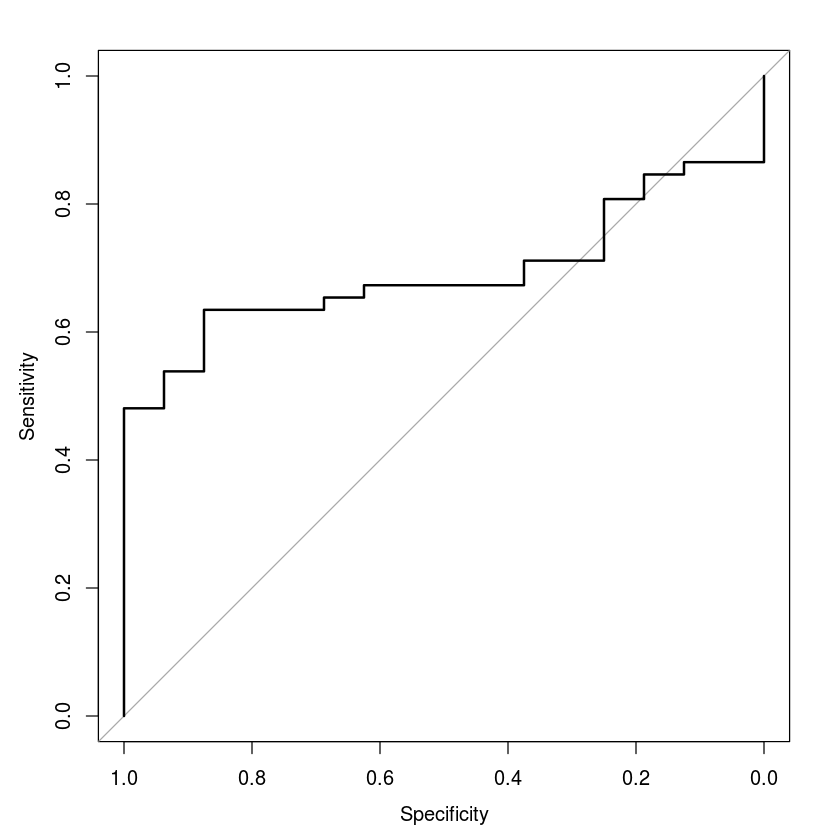

In [25]:
plot(roc_cni)
auc(roc_cni)
    ci.auc(roc_cni)

Area under the curve: 0.72

95% CI: 0.599-0.8409 (DeLong)

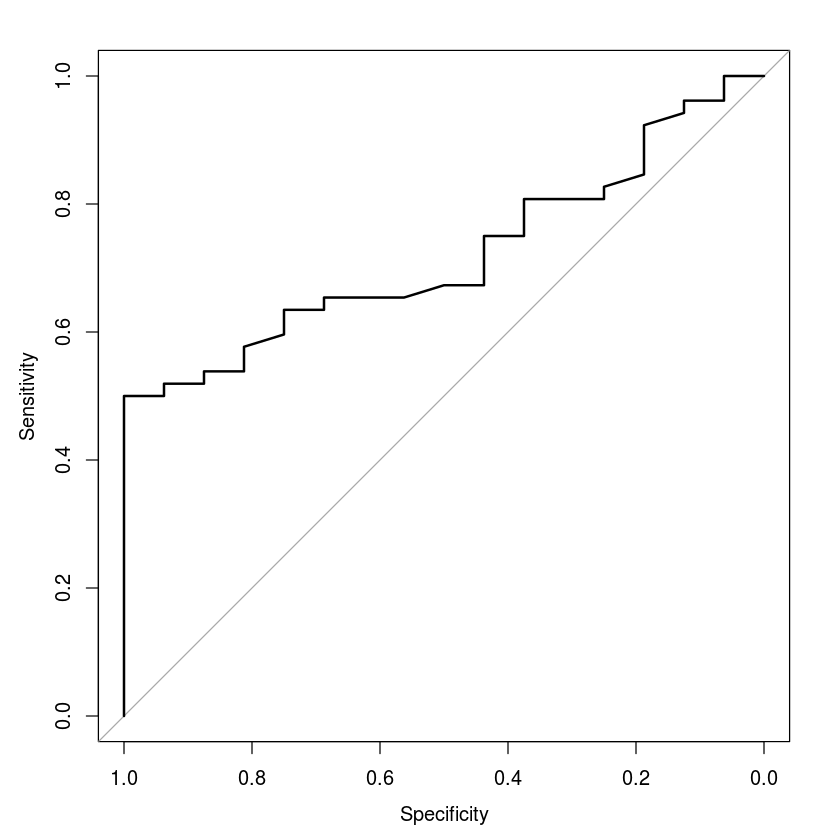

In [26]:
plot(roc_cho)
auc(roc_cho)
ci.auc(roc_cho)

Area under the curve: 0.6448

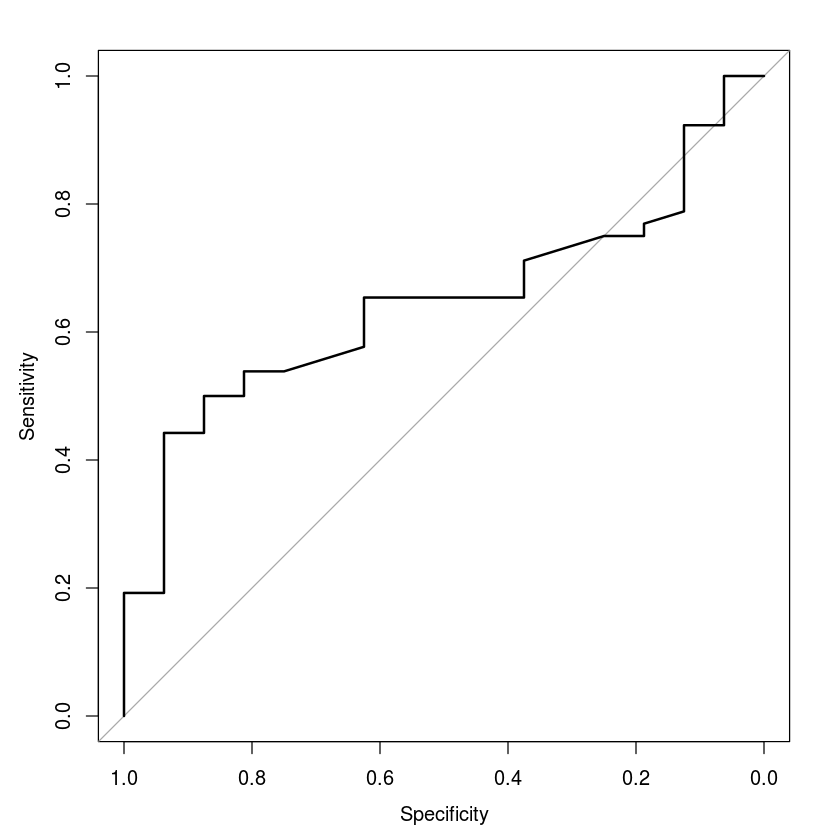

In [27]:
plot(roc_cre)
auc(roc_cre)

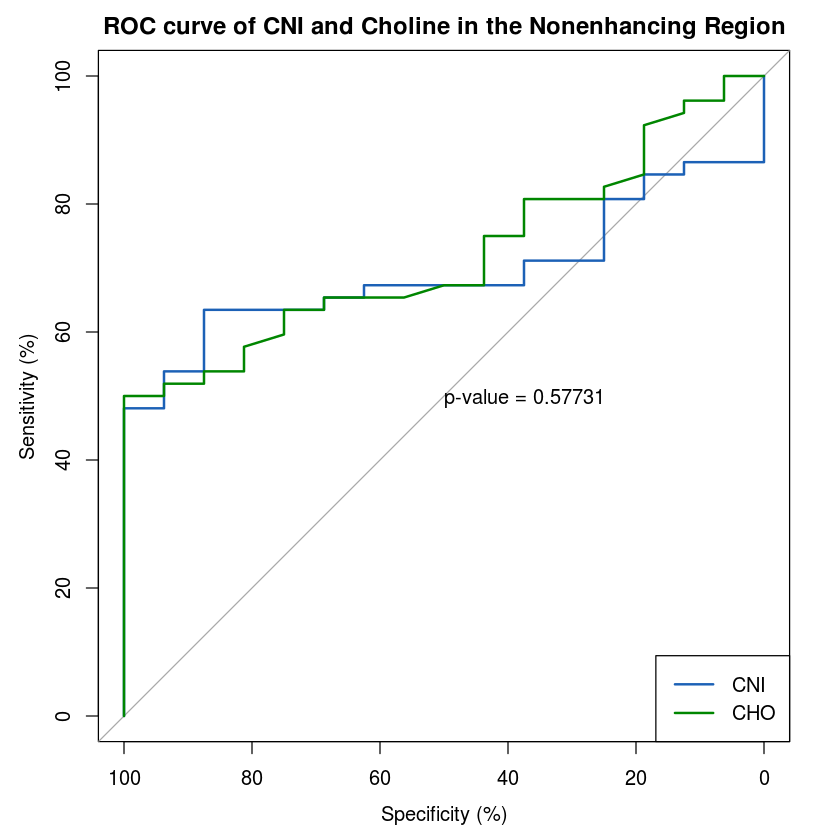

In [28]:
roc_cni_obj1 = plot.roc(recgli_nel_thresh$outcome, recgli_nel_thresh$cni,
levels=c("txe", "rHGG"), percent = TRUE, col = "#1c61b6", main = "ROC curve of CNI and Choline in the Nonenhancing Region")

roc_cho_obj2 <- lines.roc(recgli_nel_thresh$outcome, recgli_nel_thresh$ncho, 
                          levels=c("txe", "rHGG"), 
                          percent=TRUE,
                          col="#008600")
testobj <- roc.test(roc_cni_obj1, roc_cho_obj2)
text(50, 50, labels=paste("p-value =", format.pval(testobj$p.value)), adj=c(0, .5))
legend("bottomright", legend=c("CNI", "CHO"), col=c("#1c61b6", "#008600"), lwd=2)



## Testing out classification on outside samples

Split to training and testing: 

In [32]:
length(unique(recgli$t_number_y))
dim(recgli)
unique_tnums = unique(recgli_nel$t_number_y)


[1] 140

[1] 297  75

In [108]:
## Set seed & split by t_number_y
# 6
set.seed(15)
train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
test_tnums = unique_tnums[! unique_tnums %in% train_tnums]

In [109]:
table(recgli_nel$outcome)['txe']/sum(table(recgli_nel$outcome)['rHGG'], table(recgli_nel$outcome)['txe'])


txe 
0.2598425

In [110]:
## split data by patient split above: 
recgli_train= recgli[recgli$t_number_y %in% train_tnums, ]
dim(recgli_train)
recgli_test= recgli[recgli$t_number_y %in% test_tnums, ]
dim(recgli_test)

[1] 149  75

[1] 44 75

In [111]:
## make sure that the balance of outcome is good: 
table(recgli_train$outcome)['txe']/sum(table(recgli_train$outcome)['rHGG'], table(recgli_train$outcome)['txe'])
table(recgli_test$outcome)['txe']/sum(table(recgli_test$outcome)['rHGG'], table(recgli_test$outcome)['txe'])


txe 
0.2550336

txe 
0.25

### CNI

In [114]:
roc_cni = roc(recgli_train$outcome, recgli_train$cni, levels=c("txe", "rHGG"))


Area under the curve: 0.7198

95% CI: 0.6146-0.8251 (DeLong)

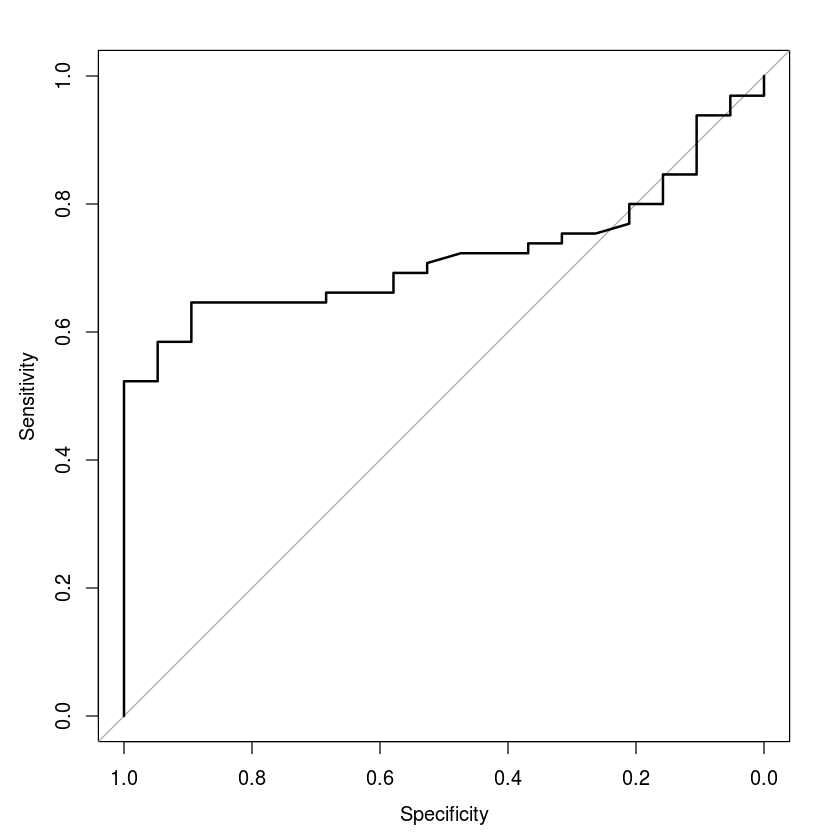

In [118]:
plot(roc_cni)
auc(roc_cni)
ci.auc(roc_cni)


In [121]:
coords(roc_cni, x = "best")

threshold specificity sensitivity 
  2.8650000   0.8947368   0.6461538

In [123]:
recgli_test$predsByCNIThresh = ifelse(recgli_test$cni > 2.865, "rHGG", "txe")

In [128]:
confusionMatrix(data = as.factor(recgli_test$predsByCNIThresh), reference = recgli_test$outcome)

Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG    8   2
      txe     9   4
                                          
               Accuracy : 0.5217          
                 95% CI : (0.3059, 0.7318)
    No Information Rate : 0.7391          
    P-Value [Acc > NIR] : 0.99327         
                                          
                  Kappa : 0.0996          
 Mcnemar's Test P-Value : 0.07044         
                                          
            Sensitivity : 0.4706          
            Specificity : 0.6667          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.3077          
             Prevalence : 0.7391          
         Detection Rate : 0.3478          
   Detection Prevalence : 0.4348          
      Balanced Accuracy : 0.5686          
                                          
       'Positive' Class : rHGG            
                                          

## CHO

In [129]:
roc_cho = roc(recgli_train$outcome, recgli_train$ncho, levels=c("txe", "rHGG"))


Area under the curve: 0.6773

95% CI: 0.5632-0.7914 (DeLong)

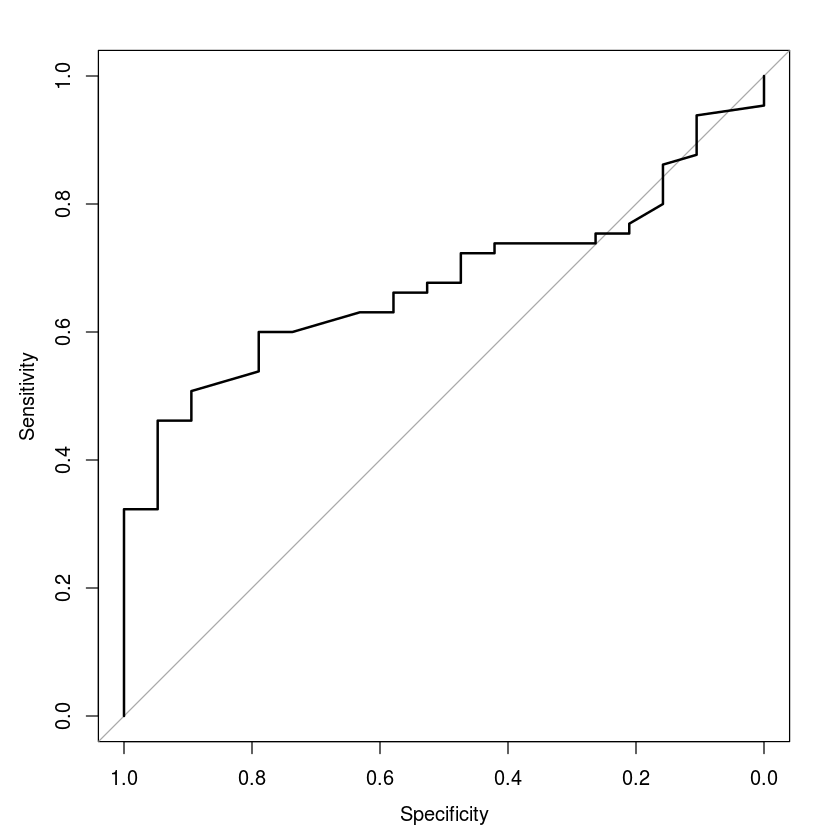

In [130]:
plot(roc_cho)
auc(roc_cho)
ci.auc(roc_cho)


In [147]:
coords(roc_cho, x = "best", best.method=c("youden"))

threshold specificity sensitivity 
  1.3550000   0.9473684   0.4615385

In [148]:
best.method=c("youden", "closest.topleft")

In [150]:
recgli_test$predsByChoThresh = ifelse(recgli_test$ncho > 1.355, "rHGG", "txe")

In [151]:
confusionMatrix(data = as.factor(recgli_test$predsByChoThresh), reference = recgli_test$outcome)

Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG    6   0
      txe    11   6
                                          
               Accuracy : 0.5217          
                 95% CI : (0.3059, 0.7318)
    No Information Rate : 0.7391          
    P-Value [Acc > NIR] : 0.993270        
                                          
                  Kappa : 0.2215          
 Mcnemar's Test P-Value : 0.002569        
                                          
            Sensitivity : 0.3529          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.3529          
             Prevalence : 0.7391          
         Detection Rate : 0.2609          
   Detection Prevalence : 0.2609          
      Balanced Accuracy : 0.6765          
                                          
       'Positive' Class : rHGG            
                                          